In [1]:
import graphix 
import numpy as np
from graphix import Circuit
import networkx as nx
import matplotlib.pyplot as plt
from graphix.gflow import flow 
from graphix.pattern import *
from graphix_pafloxy.graphix.pretty_plot_funtions import *
from qiskit.circuit import Parameter, ParameterExpression

In [2]:
th = Parameter("th")

In [3]:
pat = Pattern(4, output_nodes= {0})

pat.add(['E', (1,0)])
pat.add(['E', (0,2) ])
pat.add(['E', (0,3) ])

pat.add(['M', 2, "XY", th / 3, [], []]) 

KeyError: 2

In [29]:
pat.print_pattern()

N, node = 0
N, node = 1
N, node = 2
N, node = 3
E, nodes = (1, 0)
E, nodes = (0, 2)
E, nodes = (0, 3)


In [30]:
pat.output_nodes

{0}

In [22]:
pat.print_pattern()

N, node = 0
N, node = 1
N, node = 2
E, nodes = (1, 0)
E, nodes = (0, 2)
M, node = 2, plane = XY, angle(pi) = th/3, s-domain = [], t_domain = []


In [31]:
# pat.add(['M', 1, "XY", th, [], []])
pat.add(['M', 2, "XY", th / 3, [], []]) 

KeyError: 2

##### ex

In [9]:
qc = Circuit(2)
qc.rzz(0,1, np.pi / 3)

In [10]:
p = qc.standardize_and_transpile(opt= True)

p.print_pattern()

N, node = 0
N, node = 1
N, node = 2
E, nodes = (1, 2)
E, nodes = (0, 2)
M, node = 2, plane = XY, angle(pi) = -0.3333333333333333, s-domain = [], t_domain = [], Clifford index = 6
Z byproduct, node = 1, domain = [2]
Z byproduct, node = 0, domain = [2]


In [14]:
p.get_measurement_commands

(1, {0: {2}})

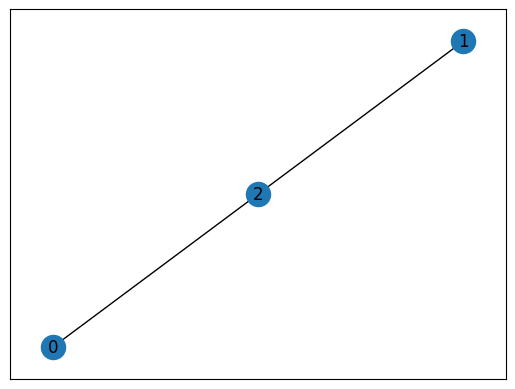

In [11]:
nx.draw_networkx(get_nx_graph(p))

In [15]:
n = 4
qc = Circuit(n)
num_layers = 2

for l in range(num_layers):

    for i in range(n-1):
        qc.rzz(i, i+1, 1/2 )
    for i in range(n):
        qc.rx(i, np.random.random() * np.pi)

        


In [16]:
pattern = qc.transpile(opt= True)
pattern.standardize()
pattern.print_pattern()

N, node = 0
N, node = 1
N, node = 2
N, node = 3
N, node = 4
N, node = 5
N, node = 6
N, node = 7
N, node = 8
N, node = 9
N, node = 10
N, node = 11
N, node = 12
N, node = 13
N, node = 14
N, node = 15
N, node = 16
N, node = 17
N, node = 18
N, node = 19
N, node = 20
N, node = 21
N, node = 22
N, node = 23
N, node = 24
N, node = 25
E, nodes = (4, 0)
E, nodes = (4, 1)
E, nodes = (5, 1)
E, nodes = (5, 2)
E, nodes = (6, 2)
E, nodes = (6, 3)
E, nodes = (0, 7)
E, nodes = (7, 8)
E, nodes = (1, 9)
E, nodes = (9, 10)
E, nodes = (2, 11)
E, nodes = (11, 12)
E, nodes = (3, 13)
E, nodes = (13, 14)
44 more commands truncated. Change lim argument of print_pattern() to show more


In [17]:
pattern._get_dependency()

{0: {4},
 1: {4, 5},
 2: {5, 6},
 3: {6},
 4: set(),
 5: set(),
 6: set(),
 7: {0},
 8: {0, 7, 15},
 9: {1},
 10: {1, 9, 15, 16},
 11: {2},
 12: {2, 11, 16, 17},
 13: {3},
 14: {3, 13, 17},
 15: {7, 9},
 16: {9, 11},
 17: {11, 13},
 18: {7, 8},
 19: {8, 18},
 20: {9, 10},
 21: {10, 20},
 22: {11, 12},
 23: {12, 22},
 24: {13, 14},
 25: {14, 24}}

In [18]:
pattern.get_layers()[1]

{0: {4, 5, 6},
 1: {0, 1, 2, 3},
 2: {7, 9, 11, 13},
 3: {15, 16, 17},
 4: {8, 10, 12, 14},
 5: {18, 20, 22, 24}}

In [19]:
l = pattern.get_local_pattern()
l.standardize()

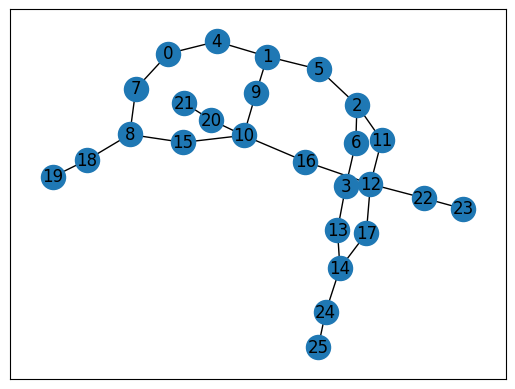

In [20]:
nx.draw_networkx(get_nx_graph(pattern))

In [22]:
pretty_plot_pattern(pattern= pattern, input_nodes= {4,5,2})

AssertionError: 

In [28]:
gflow(get_nx_graph(pattern), {4,5,2}, set(pattern.output_nodes))

(None, None)